*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

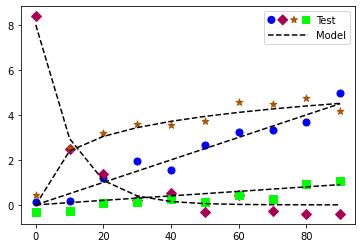

In [1]:
from matplotlib import pyplot as plt
import matplotlib.collections as mcol
import matplotlib.transforms as mtransforms
import numpy as np
from matplotlib.legend_handler import HandlerPathCollection
from matplotlib import cm


class HandlerMultiPathCollection(HandlerPathCollection):
    """
    Handler for PathCollections, which are used by scatter
    """
    def create_collection(self, orig_handle, sizes, offsets, transOffset):
        p = type(orig_handle)(orig_handle.get_paths(), sizes=sizes,
                              offsets=offsets,
                              transOffset=transOffset,
                              )
        return p

fig, ax = plt.subplots()
#make some data to plot
x = np.arange(0, 100, 10)
models = [.05 * x, 8 * np.exp(- .1 * x), np.log(x + 1), .01 * x]
tests = [model + np.random.rand(len(model)) - .5 for model in models]
#make colors and markers
colors = cm.brg(np.linspace(0, 1, len(models)))
markers = ['o', 'D', '*', 's']
markersize = 50
plots = []
#plot points and lines
for i in range(len(models)):
    line, = plt.plot(x, models[i], linestyle = 'dashed', color = 'black', label = 'Model')
    plot = plt.scatter(x, tests[i], c = colors[i], s = markersize, marker = markers[i])
    plots.append(plot)

#get attributes
paths = []
sizes = []
facecolors = []
edgecolors = []
for plot in plots:
    paths.append(plot.get_paths()[0])
    sizes.append(plot.get_sizes()[0])
    edgecolors.append(plot.get_edgecolors()[0])
    facecolors.append(plot.get_facecolors()[0])

#make proxy artist out of a collection of markers
PC = mcol.PathCollection(paths, sizes, transOffset = ax.transData, facecolors = colors, edgecolors = edgecolors)
PC.set_transform(mtransforms.IdentityTransform())
plt.legend([PC, line], ['Test', 'Model'], handler_map = {type(PC) : HandlerMultiPathCollection()}, scatterpoints = len(paths), scatteryoffsets = [.5], handlelength = len(paths))
plt.show()

In [6]:
print(len(tests),'\t',len(models),'\t',len(colors),'\t',len(paths))


4 	 4 	 4 	 4


Path(array([[-0.5, -0.5],
       [ 0.5, -0.5],
       [ 0.5,  0.5],
       [-0.5,  0.5],
       [-0.5, -0.5]]), array([ 1,  2,  2,  2, 79], dtype=uint8))


In [11]:
print(PC)

In [20]:
print(tests[0])

[-0.13992786  0.53934592  0.5292769   1.75241462  2.20459328  2.40814116
  3.16461445  3.95097742  3.79198915  4.83914595]


In [14]:
print(x)

[ 0 10 20 30 40 50 60 70 80 90]


In [ ]:
print(colors)

[[0.         0.         1.         1.        ]
 [0.66666667 0.         0.33333333 1.        ]
 [0.66666667 0.33333333 0.         1.        ]
 [0.         1.         0.         1.        ]]


In [3]:
print(len(paths))

4


In [4]:
if (ax==plt):
    print('yes')
else:
    print('no')

no


In [5]:
colors

array([[0.        , 0.        , 1.        , 1.        ],
       [0.66666667, 0.        , 0.33333333, 1.        ],
       [0.66666667, 0.33333333, 0.        , 1.        ],
       [0.        , 1.        , 0.        , 1.        ]])

In [6]:
ax.transData